# Training participation

### Import data from .xls spreadsheet

In [2]:
import pandas as pd

In [3]:
file = 'training.xls'

xl = pd.ExcelFile(file)
training = xl.parse('training')

### Data inspection

In [4]:
print(training.head())

       date  day_counter  white  yellow  orange  green  blue  brown  black  \
0  20130411            1      4       2       0      3     2      2      4   
1  20130418            8      3       1       0      1     2      3      3   
2  20130425           15      3       1       0      1     1      4      3   
3  20130502           22      5       2       0      2     2      3      4   
4  20130516           36      4       2       0      2     4      3      2   

   day_of_the_year  year  month  day      date2  total  weekday  label  
0              101     0      4   11 2013-04-11     17        0      1  
1              108     0      4   18 2013-04-18     13        0      1  
2              115     0      4   25 2013-04-25     13        0      1  
3              122     0      5    2 2013-05-02     18        0      1  
4              136     0      5   16 2013-05-16     17        0      1  


In [5]:
training_summary = training.describe()
print(training_summary)

               date  day_counter       white      yellow      orange  \
count  2.420000e+02   242.000000  242.000000  242.000000  242.000000   
mean   2.016270e+07  1242.152893    1.714876    0.785124    0.665289   
std    1.717841e+04   621.027075    1.669008    0.836974    0.854299   
min    2.013041e+07     1.000000    0.000000    0.000000    0.000000   
25%    2.015032e+07   709.750000    0.000000    0.000000    0.000000   
50%    2.017021e+07  1406.500000    1.000000    1.000000    0.000000   
75%    2.018012e+07  1743.250000    3.000000    1.000000    1.000000   
max    2.019022e+07  2147.000000   11.000000    3.000000    4.000000   

            green        blue       brown       black  day_of_the_year   year  \
count  242.000000  242.000000  242.000000  242.000000       242.000000  242.0   
mean     0.644628    1.413223    2.194215    4.028926       171.206612    0.0   
std      0.760645    1.019881    1.232129    1.557737       109.815229    0.0   
min      0.000000    0.0000

In [6]:
data = training[["white", "yellow", "orange", "green", "blue", "brown", "black", "total", "label"]] 
features = training[["white", "yellow", "orange", "green", "blue", "brown", "black", "total"]] 
labels = training["label"]

In [7]:
print(data.head())
print(features.head())
print(labels.head())

   white  yellow  orange  green  blue  brown  black  total  label
0      4       2       0      3     2      2      4     17      1
1      3       1       0      1     2      3      3     13      1
2      3       1       0      1     1      4      3     13      1
3      5       2       0      2     2      3      4     18      1
4      4       2       0      2     4      3      2     17      1
   white  yellow  orange  green  blue  brown  black  total
0      4       2       0      3     2      2      4     17
1      3       1       0      1     2      3      3     13
2      3       1       0      1     1      4      3     13
3      5       2       0      2     2      3      4     18
4      4       2       0      2     4      3      2     17
0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64


In [8]:
data_summary = data.describe()
print(data_summary)

            white      yellow      orange       green        blue       brown  \
count  242.000000  242.000000  242.000000  242.000000  242.000000  242.000000   
mean     1.714876    0.785124    0.665289    0.644628    1.413223    2.194215   
std      1.669008    0.836974    0.854299    0.760645    1.019881    1.232129   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    1.000000    1.000000   
50%      1.000000    1.000000    0.000000    0.000000    1.000000    2.000000   
75%      3.000000    1.000000    1.000000    1.000000    2.000000    3.000000   
max     11.000000    3.000000    4.000000    3.000000    4.000000    5.000000   

            black       total       label  
count  242.000000  242.000000  242.000000  
mean     4.028926   11.446281    0.772727  
std      1.557737    3.515114    0.419939  
min      1.000000    3.000000    0.000000  
25%      3.000000    9.000000    1.000000  
50%   

In [9]:
import matplotlib.pyplot as plt

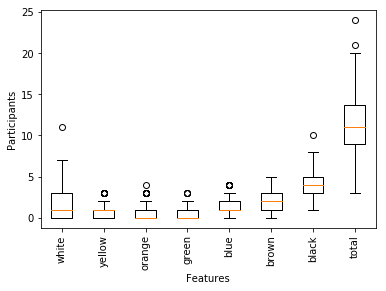

In [10]:
array = features.values[:, :]
plt.boxplot(array)
plt.xticks(list(range(1, len(features.columns) + 1)), list(features.columns), rotation = 'vertical')
plt.xlabel("Features")
plt.ylabel("Participants")
plt.show()

In [11]:
features_normalized = features.copy()
ncols = len(features.columns)

for i in range(ncols): 
    mean = data_summary.iloc[1, i]
    sd = data_summary.iloc[2, i]
    
    features_normalized.iloc[:, i:(i + 1)] = (features_normalized.iloc[:, i:(i + 1)] - mean) /sd

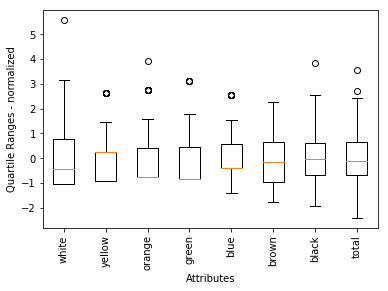

In [12]:
array = features_normalized.values[:, :]
plt.boxplot(array)
plt.xticks(list(range(1, len(features.columns) + 1)), list(features.columns), rotation = 'vertical')
plt.xlabel("Attributes")
plt.ylabel("Quartile Ranges - normalized")
plt.show()

### Propability plots

In [13]:
from scipy import stats

Feature white:


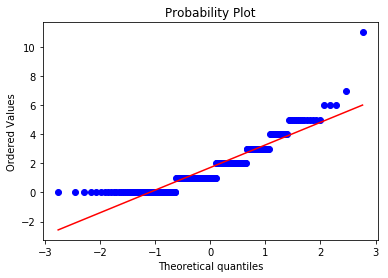

Feature yellow:


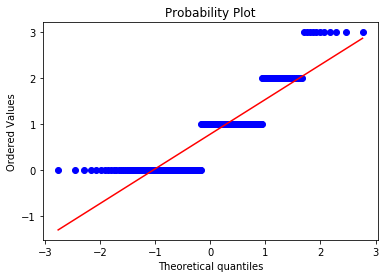

Feature orange:


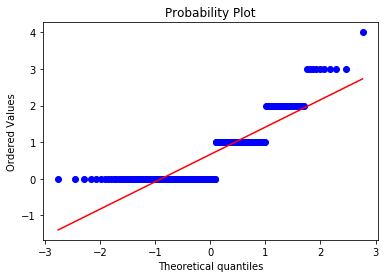

Feature green:


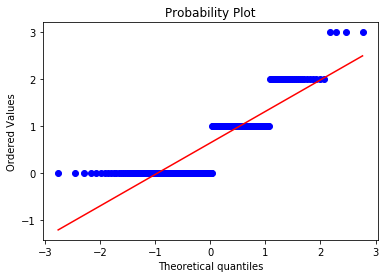

Feature blue:


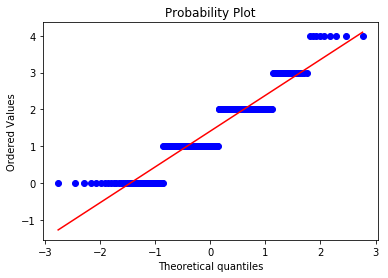

Feature brown:


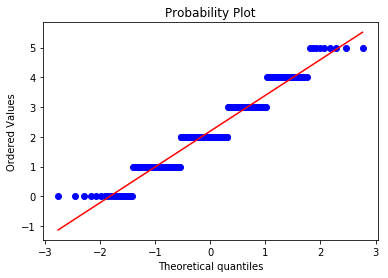

Feature black:


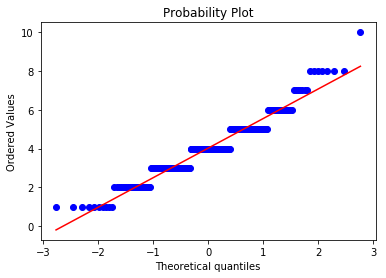

Feature total:


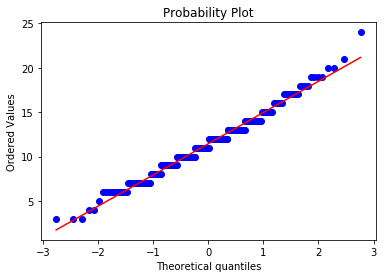

In [14]:
for col in range(len(data_summary)):
    stats.probplot(features.iloc[:,col], dist = "norm", plot = plt)
    print("Feature " + data_summary.columns[col] + ":")
    plt.show()

### Correlation heat map

In [15]:
corMat = pd.DataFrame(data.corr())
print(corMat)

           white    yellow    orange     green      blue     brown     black  \
white   1.000000  0.095568  0.025915  0.027714  0.225515 -0.063759  0.103733   
yellow  0.095568  1.000000 -0.077791 -0.022677  0.070424  0.088918 -0.106603   
orange  0.025915 -0.077791  1.000000 -0.349827  0.073679  0.251229  0.368996   
green   0.027714 -0.022677 -0.349827  1.000000  0.083104 -0.142993 -0.089342   
blue    0.225515  0.070424  0.073679  0.083104  1.000000 -0.169794  0.102141   
brown  -0.063759  0.088918  0.251229 -0.142993 -0.169794  1.000000  0.131098   
black   0.103733 -0.106603  0.368996 -0.089342  0.102141  0.131098  1.000000   
total   0.598912  0.264030  0.434079  0.073529  0.435624  0.380369  0.612959   
label   0.108448  0.250062 -0.189789 -0.007086  0.036111 -0.162939 -0.395868   

           total     label  
white   0.598912  0.108448  
yellow  0.264030  0.250062  
orange  0.434079 -0.189789  
green   0.073529 -0.007086  
blue    0.435624  0.036111  
brown   0.380369 -0.16293

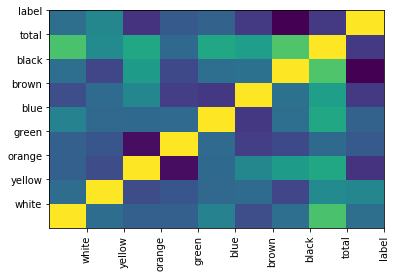

In [16]:
plt.pcolor(corMat)
plt.xticks(list(range(1, len(data_summary.columns) + 1)), list(data_summary.columns), rotation = 'vertical')
plt.yticks(list(range(1, len(data_summary.columns) + 1)), list(data_summary.columns), rotation = 'horizontal')
plt.show()

### Timeseries plot

In [17]:
color_list = ["w", "y", "orange", "g", "b", "brown", "k", "grey"]

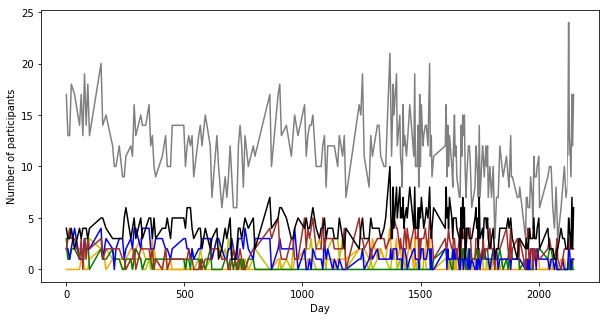

In [18]:
for i in range(len(features.columns)):
    plt.plot(training["day_counter"], features.iloc[:,i-1], color_list[i-1])
   
plt.xlabel("Day")
plt.ylabel("Number of participants")
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

#### label 0:

In [19]:
index_0 = [index for index, value in enumerate(labels) if value == 0]
features_0 = features.take(index_0)
days_0 = training["day_counter"].take(index_0)

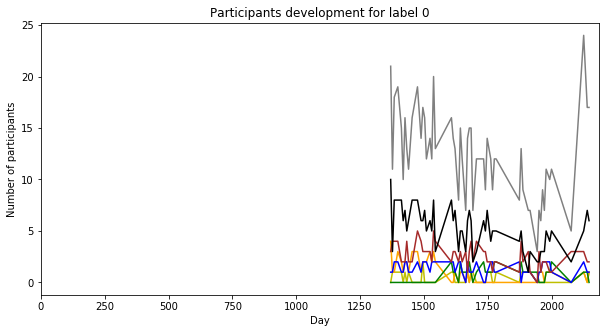

In [20]:
for i in range(len(features.columns)):
    plt.plot(days_0, features_0.iloc[:,i-1], color_list[i-1])

ax = plt.gca()
ax.set_xlim(left = 0)
plt.title("Participants development for label 0")
plt.xlabel("Day")
plt.ylabel("Number of participants")
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

#### label 1:

In [21]:
index_1 = [index for index, value in enumerate(labels) if value == 1]
features_1 = features.take(index_1)
days_1 = training["day_counter"].take(index_1)

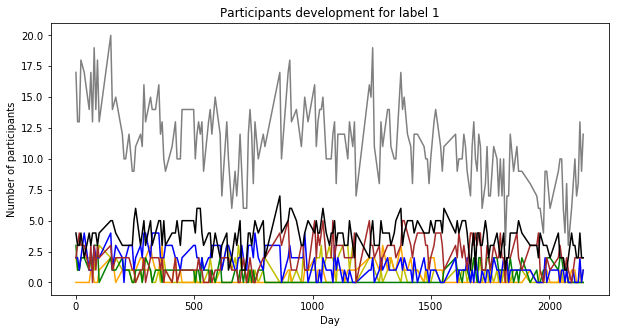

In [22]:
for i in range(len(features.columns)):
    plt.plot(days_1, features_1.iloc[:,i-1], color_list[i-1])

plt.title("Participants development for label 1")
plt.xlabel("Day")
plt.ylabel("Number of participants")
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

### Lasso Regression

In [23]:
from sklearn import linear_model

In [36]:
model = linear_model.LassoCV(normalize = True, cv = 10).fit(features, labels)

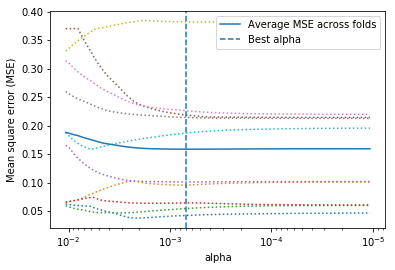

In [37]:
plt.plot(model.alphas_, model.mse_path_, ":")
plt.plot(model.alphas_, model.mse_path_.mean(axis=-1), label = "Average MSE across folds")
plt.axvline(model.alpha_, linestyle = "--", label = "Best alpha")
plt.legend()
plt.semilogx()
ax = plt.gca()
ax.invert_xaxis()
plt.axis("tight")
plt.ylabel("Mean square error (MSE)")
plt.xlabel("alpha")
plt.show()

In [32]:
features.columns.tolist()


['white', 'yellow', 'orange', 'green', 'blue', 'brown', 'black', 'total']

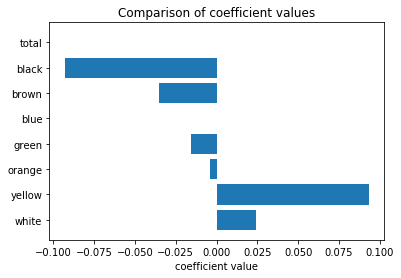

In [40]:
model_coef = model.coef_

plt.barh(range(len(model_coef)), model_coef, align = "center")
plt.yticks(range(len(model_coef)), features.columns.tolist())
plt.xlabel("coefficient value")
plt.title("Comparison of coefficient values")
plt.show()